In [8]:
import numpy as np
import math
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import uniform
from scipy.stats import beta
from scipy.stats import gamma
from scipy.stats import binom
from IPython.display import Image
import scipy
import random
import scipy.integrate as integrate


mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
fig_dpi      = 300
fig_typeface = 'Helvetica'
fig_family   = 'monospace'
fig_style    = 'normal'

# Q1

## a.

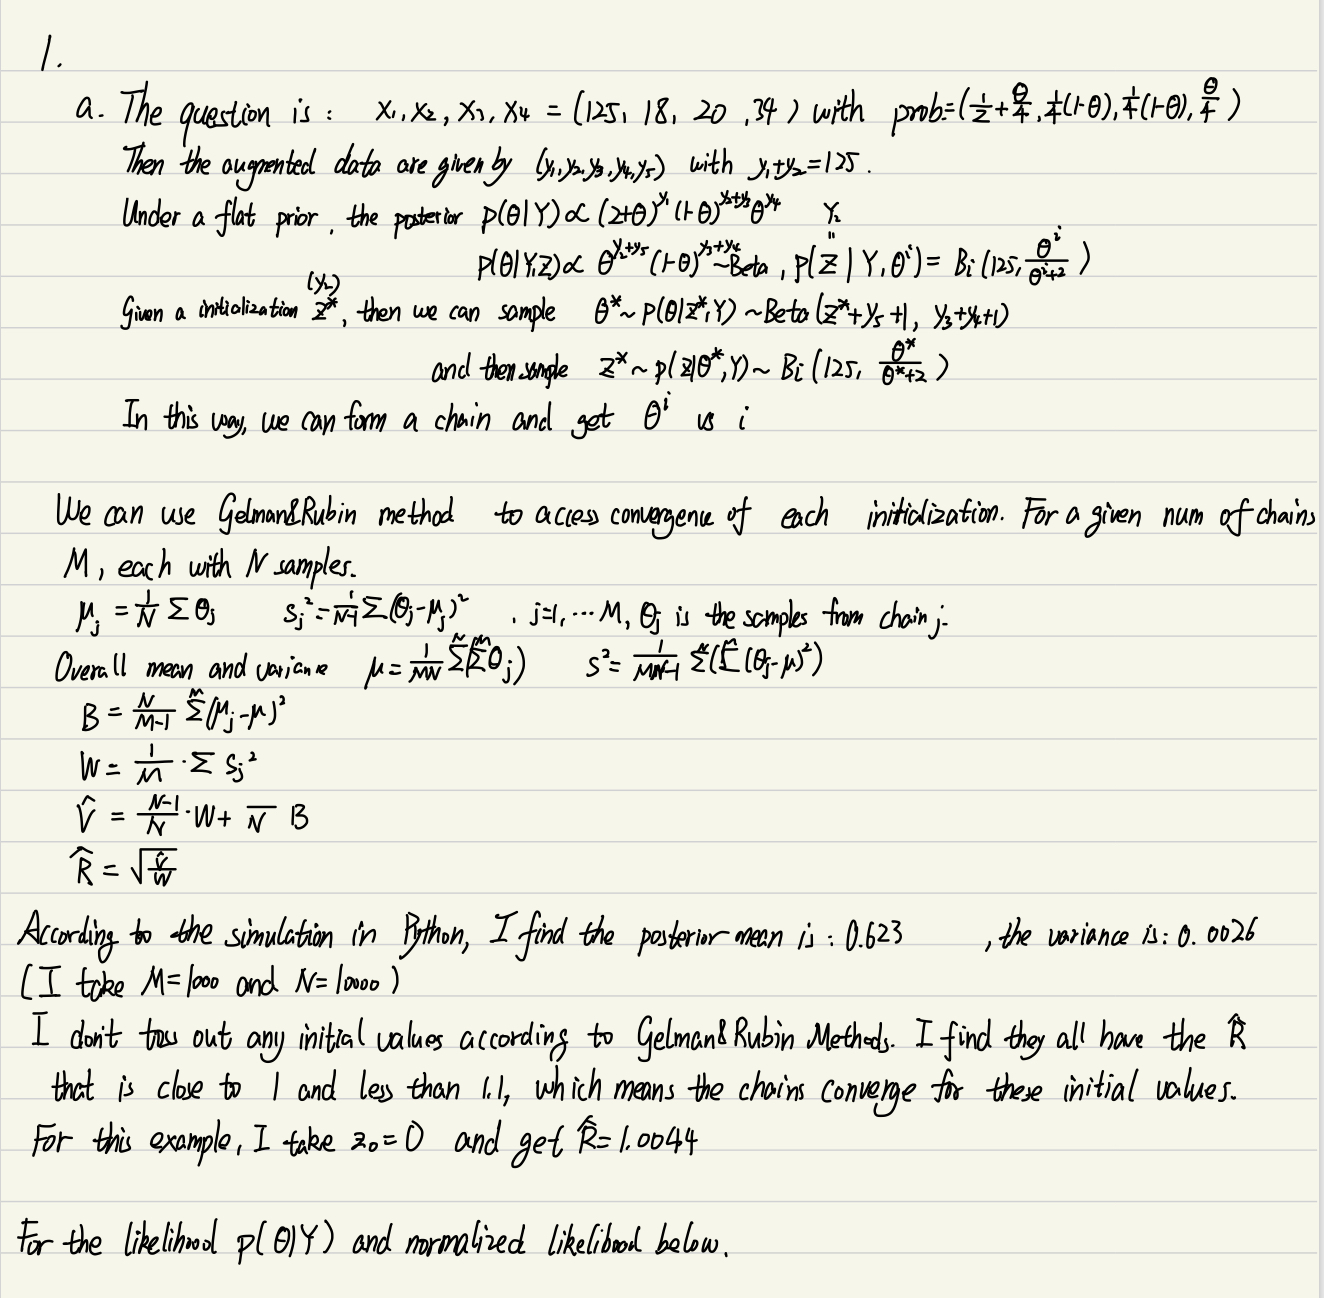

In [14]:
Image(filename="FQ1_a.jpeg")

In [37]:
# Give the initialization and iterNum M and sampleSz N
M = 1000
N = 10000
thetas = []
thetaMs = []
thetaSVs = []


z0Value = 0
z0 = np.array([z0Value for i in range(N)])
x1, x2, x3, x4 = (125, 18, 20, 34)
y1, y2, y3, y4, y5 = (125-z0Value, z0Value, 18, 20, 34)
# 1. iterations

for _ in range(M):
    z = z0
    thetai = np.random.beta(z0 + y5 + 1, y3 + y4 + 1, N)
    z0 = np.random.binomial(125, thetai/(2 + thetai), N)
    Muj = np.mean(thetai)
    SV = 1/(N-1)*np.sum((thetai - Muj)**2)
    thetaMs.append(Muj)
    thetaSVs.append(SV)
    thetas.append(thetai.tolist())
    
# Calculate Gelman-Rubin:
mu = 1/(M*N)*np.sum(thetas)
SV = 1/(M*N-1)*np.sum((N-1)*np.array(thetaSVs))
B = N/(M-1)*sum([(muj - mu)**2 for muj in thetaMs])
W = 1/M*sum(thetaSVs)
V_hat = (N-1)/N*W + 1/N*B
R_hat = np.sqrt(V_hat/W)
print(R_hat)

1.0044005147977342


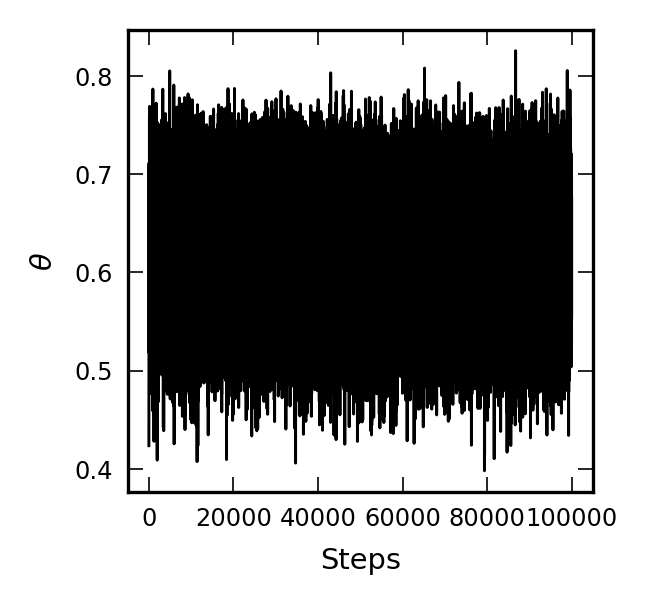

(0.6230044821354126, 0.002571009087313842)

In [38]:
np.mean(thetaMs[:]),np.var(thetaMs[:])

# Give the initialization and iterNum M and sampleSz N
M = 100000
N = 1
thetas = []
thetaMs = []

z0Value = 0
z0 = np.array([z0Value for i in range(N)])
x1, x2, x3, x4 = (125, 18, 20, 34)
y1, y2, y3, y4, y5 = (125-z0Value, z0Value, 18, 20, 34)
# 1. iterations

for _ in range(M):
    z = z0
    thetai = np.random.beta(z0 + y5 + 1, y3 + y4 + 1, N)
    z0 = np.random.binomial(125, thetai/(2 + thetai), N)
    Muj = np.mean(thetai)
    thetaMs.append(Muj)
    thetas.append(thetai.tolist())
    
f, ax = plt.subplots(1, 1, figsize=(2, 2), facecolor='white', dpi=300, gridspec_kw={'hspace': 0., 'wspace': 0.})
ax.plot(np.arange(M), thetaMs, color = "black",ls = '-', lw=.7, zorder = 1)

ax.tick_params(axis='both', which='both', labelsize='xx-small', right=True, top=True, direction='in', width=.4)   
ax.set_xlabel("Steps", size='x-small')   
ax.set_ylabel(r"$\theta$", size='x-small')
plt.show()

np.mean(thetaMs), np.var(thetaMs)

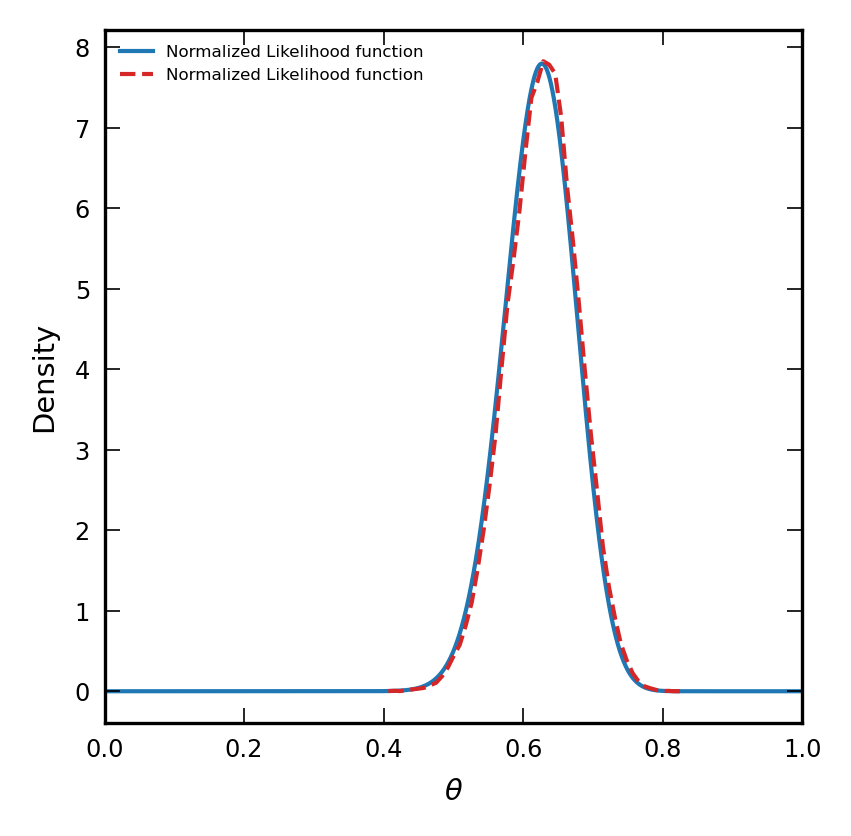

In [39]:
def likelihood(theta, n):
    n1, n2, n3, n4 = n
    return (2+theta)**n1 * (1-theta)**n2 * (1-theta)**n3 * (theta)**n4
n = (125, 18, 20, 34)
theta = np.linspace(0, 1, 1000000)
L = likelihood(theta, n)
I = integrate.quad(likelihood, 0, 1, args=[n[i] for i in range(4)])
L_norm = L/(I[0] - I[1])

f, ax = plt.subplots(1, 1, figsize=(3, 3), facecolor='white', dpi=300, gridspec_kw={'hspace': 0., 'wspace': 0.})
ax.plot(theta, L_norm, color = "tab:blue",ls = '-', lw=1, label='Normalized Likelihood function', zorder = 1)
density = np.histogram(thetaMs, bins=50, density=True)
plt.plot(density[1][1:], density[0], color = "tab:red",ls = '--', lw=1, label='Normalized Likelihood function', zorder = 1 )



ax.tick_params(axis='both', which='both', labelsize='xx-small', right=True, top=True, direction='in', width=.4)   
ax.set_xlabel(r"$\theta$", size='x-small')   
ax.set_ylabel("Density", size='x-small')
ax.set_xlim([0, 1])
ax.legend(loc = 2 ,fontsize = 4,markerscale = 3,ncol = 1,scatterpoints= 1,frameon = True,framealpha =0.).get_frame().set_linewidth(0.0)
plt.show()

## b.

In the same way, for $(x_1, x_2, x_3, x_4) = (14, 0, 1, 5)$ with the same corresponding probability. Repeat the steps above.

In [40]:
# Give the initialization and iterNum M and sampleSz N
M = 1000
N = 10000
thetas = []
thetaMs = []
thetaSVs = []

z0Value = 0
z0 = np.array([z0Value for i in range(N)])
x1, x2, x3, x4 = (14, 0, 1, 5)
y1, y2, y3, y4, y5 = (14-z0Value, z0Value, 0, 1, 5)
# 1. iterations

for _ in range(M):
    z = z0
    thetai = np.random.beta(z0 + y5 + 1, y3 + y4 + 1, N)
    z0 = np.random.binomial(14, thetai/(2 + thetai), N)
    Muj = np.mean(thetai)
    SV = 1/(N-1)*np.sum((thetai - Muj)**2)
    thetaMs.append(Muj)
    thetaSVs.append(SV)
    thetas.append(thetai.tolist())
    
# Calculate Gelman-Rubin:
mu = 1/(M*N)*np.sum(thetas)
SV = 1/(M*N-1)*np.sum((N-1)*np.array(thetaSVs))
B = N/(M-1)*sum([(muj - mu)**2 for muj in thetaMs])
W = 1/M*sum(thetaSVs)
V_hat = (N-1)/N*W + 1/N*B
R_hat = np.sqrt(V_hat/W)
print(R_hat)

1.0002912285820016


After trying some other initialization, we can still find the similar results with a, which shows the convergence of the chains

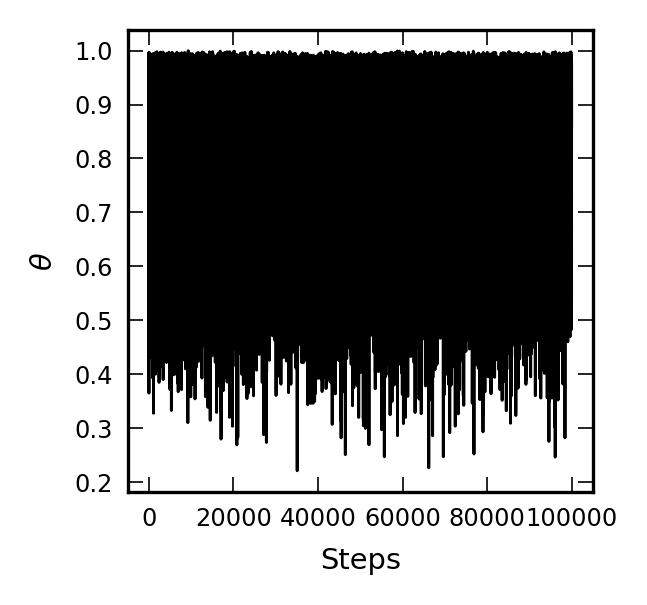

(0.8301818704732893, 0.011772538866183763)

In [41]:
np.mean(thetaMs[:]),np.var(thetaMs[:])

# Give the initialization and iterNum M and sampleSz N
M = 100000
N = 1
thetas = []
thetaMs = []

z0Value = 0
z0 = np.array([z0Value for i in range(N)])
x1, x2, x3, x4 = (14, 0, 1, 5)
y1, y2, y3, y4, y5 = (14-z0Value, z0Value, 0, 1, 5)
# 1. iterations

for _ in range(M):
    z = z0
    thetai = np.random.beta(z0 + y5 + 1, y3 + y4 + 1, N)
    z0 = np.random.binomial(14, thetai/(2 + thetai), N)
    Muj = np.mean(thetai)
    thetaMs.append(Muj)
    thetas.append(thetai.tolist())
    
f, ax = plt.subplots(1, 1, figsize=(2, 2), facecolor='white', dpi=300, gridspec_kw={'hspace': 0., 'wspace': 0.})
ax.plot(np.arange(M), thetaMs, color = "black",ls = '-', lw=.7, zorder = 1)

ax.tick_params(axis='both', which='both', labelsize='xx-small', right=True, top=True, direction='in', width=.4)   
ax.set_xlabel("Steps", size='x-small')   
ax.set_ylabel(r"$\theta$", size='x-small')
plt.show()

np.mean(thetaMs), np.var(thetaMs)

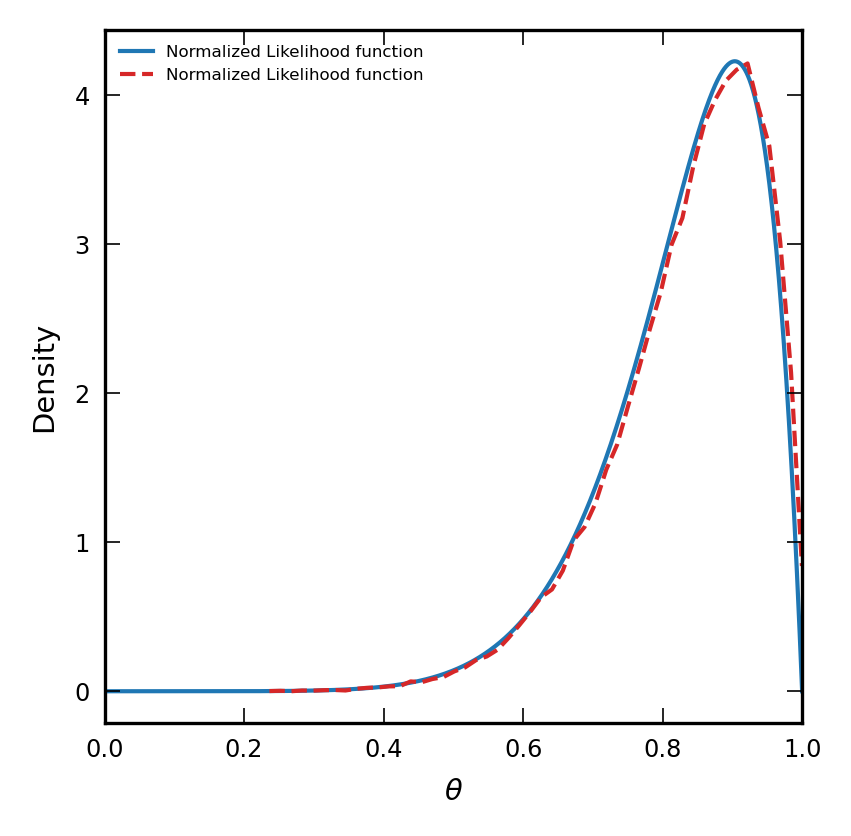

In [44]:
def likelihood(theta, n):
    n1, n2, n3, n4 = n
    return (2+theta)**n1 * (1-theta)**n2 * (1-theta)**n3 * (theta)**n4
n = (14, 0, 1, 5)
theta = np.linspace(0, 1, 1000000)
L = likelihood(theta, n)
I = integrate.quad(likelihood, 0, 1, args=[n[i] for i in range(4)])
L_norm = L/(I[0] - I[1])

f, ax = plt.subplots(1, 1, figsize=(3, 3), facecolor='white', dpi=300, gridspec_kw={'hspace': 0., 'wspace': 0.})
ax.plot(theta, L_norm, color = "tab:blue",ls = '-', lw=1, label='Normalized Likelihood function', zorder = 1)
density = np.histogram(thetaMs, bins=50, density=True)
plt.plot(density[1][1:], density[0], color = "tab:red",ls = '--', lw=1, label='Normalized Likelihood function', zorder = 1 )



ax.tick_params(axis='both', which='both', labelsize='xx-small', right=True, top=True, direction='in', width=.4)   
ax.set_xlabel(r"$\theta$", size='x-small')   
ax.set_ylabel("Density", size='x-small')
ax.set_xlim([0, 1])
ax.legend(loc = 2 ,fontsize = 4,markerscale = 3,ncol = 1,scatterpoints= 1,frameon = True,framealpha =0.).get_frame().set_linewidth(0.0)
plt.show()

We can use Gibbs sampler to get theta_i and find the convergence traces and use Gelman-Rubin method to check convergence after choosing M and N. We can find both situations will conver in the end and plot the normalized likelihood and simulation density above.